# **PROJECT TITLE: Sentiment Classification of Product-Related Tweets Using NLP**

![Twitter](Images/Twitter.png)

# **BUSINESS UNDERSTANDING** 

## **PROJECT OVERVIEW**
This project uses a labeled dataset of tweets (df_Tweet) to build a sentiment classification model. Each tweet contains free-form text and metadata such as the target of the emotion and whether an emotion is directed at a product or brand.

The project follows these main stages:

Text preprocessing (cleaning, tokenization)

Exploratory Data Analysis (EDA)

Addressing class imbalance

Feature engineering

Building and evaluating classification models

The final model will classify whether a tweet contains emotion directed at a product or brand, enabling automated monitoring of customer sentiment on social media.

## **PROBLEM STATEMENT**
Given a dataset of tweets, the goal is to automatically detect whether a tweet contains emotion directed at a product or brand. This is formulated as a binary classification problem where the label is "Yes" or "No".

## **OBJECTIVES**
1. To build a machine learning model that can classify whether a tweet contains an emotion directed at a brand or product, using only the tweet text.

2. To clean and preprocess tweet data by converting text to lowercase, removing punctuation, URLs, and mentions, and tokenizing for feature extraction.

3. To explore and analyze the dataset through visualizations that reveal key patterns such as tweet length, emotional targets, and class imbalance.


4. To address class imbalance in the dataset and improve model performance using resampling techniques or appropriate evaluation metrics.


# **1. DATA LOADING & EXPLORATION**
Before diving into analysis or modeling, it’s essential to load the dataset properly and explore its structure to understand what kind of data you're working with.

🔹 a) . Data Loading
We start by importing the necessary libraries and reading the dataset using pandas. Due to encoding issues that may arise when reading text data, we use the 'ISO-8859-1' encoding instead of the default 'utf-8'.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import re
import string
from collections import Counter
from sklearn.utils import resample

In [2]:
# Loading the dataset
df_Tweet = pd.read_csv('Data/tweet_product_company.csv', encoding='ISO-8859-1')

# Preview the first 5 rows
df_Tweet.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


🔹 b) . Basic Dataset Information
Understanding the size and structure of the dataset helps inform how we’ll process it.

In [3]:
# Check number of rows and columns
df_Tweet.shape


(9093, 3)

In [4]:
# Display column names
df_Tweet.columns


Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [5]:
# Get basic information about data types and missing values
df_Tweet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


🔹 c). Statistical Summary
We can describe the numerical columns (if any) to see general trends like average values, min/max, and standard deviations.


In [6]:
# Summary statistics of the dataset
df_Tweet.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


In [7]:
# For categorical or text columns
df_Tweet.describe(include=['object'])


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


In [8]:
#Changing the column names
df_Tweet.columns = ['text', 'target', 'emotion']
df_Tweet.head()

,text,target,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


🔹 d). Checking for Missing Values

In [9]:
# Check for missing values in the dataset
df_Tweet.isnull().sum()

text          1
target     5802
emotion       0
dtype: int64

🔹 5. Duplicate Check

In [10]:
# Check for duplicate rows
df_Tweet.duplicated().sum()

22

# **2.DATA CLEANING**
Data cleaning means fixing these issues so the data is reliable and accurate for analysis.

 1. tweet_text — Missing: 1 row
This is the most critical feature because your model relies on the content of the tweet to predict sentiment.

In [11]:
# Drop rows with missing values in 'tweet_text'
df_Tweet.dropna(subset=['text'], inplace=True)

2. emotion_in_tweet_is_directed_at — Missing: 5802 rows
This column indicates whether the emotion is directed at a brand/product. It may be useful as a feature, but it's not essential for basic sentiment classification based on text.

In [12]:
# Fill missing values in 'target' with 'None'
df_Tweet['target'].fillna('None', inplace=True)

## Drop the Duplicates

In [13]:
# Droping duplicates

df_Tweet.drop_duplicates(inplace=True)

df_Tweet.drop_duplicates(subset='text', inplace=True)


In [14]:
# Check is duplicates were removed
df_Tweet.duplicated(subset='text').sum()

0

In [15]:
print("Target value count before mapping:",df_Tweet['target'].value_counts())
brand_mapping = {
    'iPad': 'Apple',
    'Apple': 'Apple',
    'iPad or iPhone App': 'Apple',
    'iPhone': 'Apple',
    'Other Apple product or service': 'Apple',
    'Google': 'Google',
    'Other Google product or service': 'Google',
    'Android App': 'Google',
    'Android': 'Google',
    "None": "None"
}

# Apply the mapping to create new brand column
df_Tweet['brand'] = df_Tweet['target'].map(brand_mapping)
df_Tweet['brand'].value_counts()

Target value count before mapping: None                               5785
iPad                                943
Apple                               659
iPad or iPhone App                  469
Google                              428
iPhone                              296
Other Google product or service     293
Android App                          80
Android                              77
Other Apple product or service       35
Name: target, dtype: int64


None      5785
Apple     2402
Google     878
Name: brand, dtype: int64

## **3.EDA (DATA ANALYSIS) & DATA VISUALIZATION**
EDA is like getting to know my data — it’s the first step where i carefully examined the dataset to understand its main characteristics.

Data Visualization is the process of creating charts, graphs, and maps that turn numbers and data into pictures.

### **1. UNIVARIATE ANALYSIS**
#### Checking for distribution of the data and visualizing it.

#### Univariate analysis is the simplest form of data analysis — it examines just one variable at a time.

#### Examples include: Bar Graphs, Histogram, Box Plot, Pie Chart

Class imbalance may exist, which is important to handle before training a model (through resampling or class weighting).

🔹 a) Tweet Length Distribution 

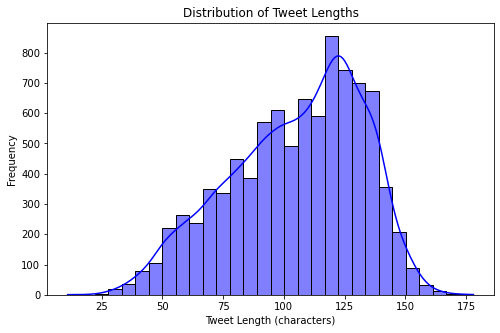

In [16]:
# Check distribution of Tweet lengths
df_Tweet['tweet_length'] = df_Tweet['text'].apply(len)

plt.figure(figsize=(8,5))
sns.histplot(df_Tweet['tweet_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length (characters)')
plt.ylabel('Frequency')
plt.show()

Most tweets are between 50–150 characters, suggesting tweets are short-form.

🔹 b) Word Count Distribution

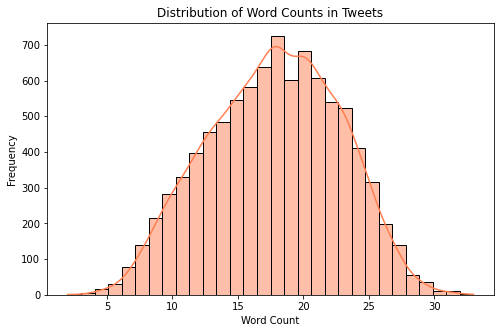

In [17]:
# Check the distribution of word counts in tweets
df_Tweet['word_count'] = df_Tweet['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.histplot(df_Tweet['word_count'], bins=30, kde=True, color='coral')
plt.title('Distribution of Word Counts in Tweets')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


Tweets have 5 to 20 words on average.

Confirms that token-level feature engineering is manageable.


### **2. BIVARIATE ANALYSIS**
#### Checking for correlations; multiple Xs and Y

#### Bivariate analysis explores the relationship between two variables.

#### Purpose: To identify whether and how the variables are related — for example, does one increase when the other does?

#### Examples include: Heatmaps, Line Graphs,Bar Plot, Scatter Plot .

🔹 a) Tweet Length vs Sentiment (Target)

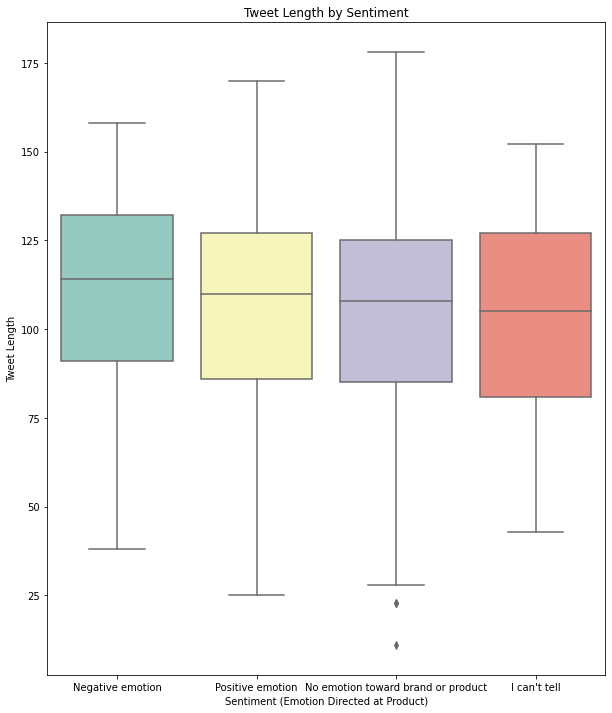

In [18]:
# Boxplot of Word Count by Sentiment
plt.figure(figsize=(10,12))
sns.boxplot(data=df_Tweet, 
            x='emotion', 
            y='tweet_length', 
            palette='Set3')
plt.title('Tweet Length by Sentiment')
plt.xlabel('Sentiment (Emotion Directed at Product)')
plt.ylabel('Tweet Length')
plt.show()


Tweets marked with emotion (Yes) are generally longer.

Therefore the tweet length may be predictive of emotional content and can be included as a feature in modeling.

🔹 b) Word Count vs Sentiment

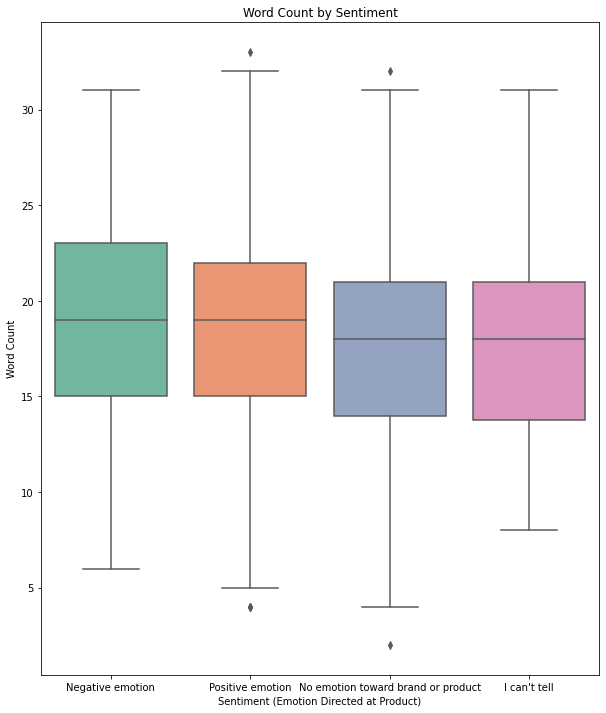

In [19]:
# Boxplot of Word Count by Sentiment
plt.figure(figsize=(10,12))
sns.boxplot(data=df_Tweet, 
            x='emotion', 
            y='word_count', 
            palette='Set2')
plt.title('Word Count by Sentiment')
plt.xlabel('Sentiment (Emotion Directed at Product)')
plt.ylabel('Word Count')
plt.show()


Emotional tweets tend to have more words, suggesting wordiness correlates with sentiment.

### **3. MULTIVARIATE ANALYSIS**

#### way of exploring how three or more variables (characteristics) relate to each other at the same time.

#### Purpose: To understand complex relationships and interactions among multiple variables.

#### Examples include: Heatmaps, Scatterplots, Pairplots, 3D Scatter Plot, Parallel Coordinates Plot


🔹 a) Emotion Target vs Sentiment

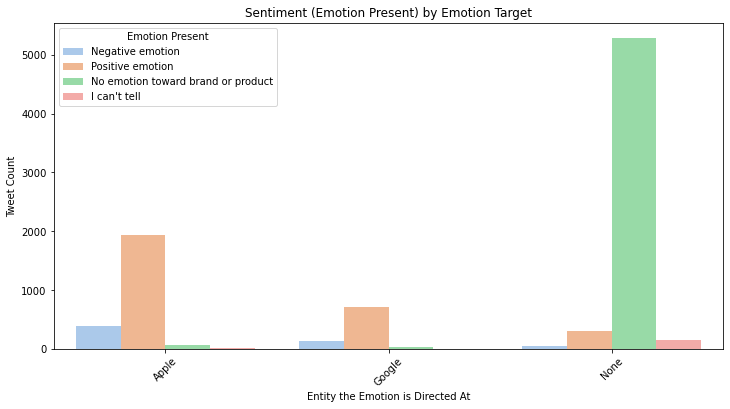

In [20]:
# Countplot of Sentiment (Emotion Present) by Emotion Target
plt.figure(figsize=(12,6))
sns.countplot(
    data=df_Tweet, 
    x='brand', 
    hue='emotion', 
    palette='pastel'
)
plt.xticks(rotation=45)
plt.title('Sentiment (Emotion Present) by Emotion Target')
plt.xlabel('Entity the Emotion is Directed At')
plt.ylabel('Tweet Count')
plt.legend(title='Emotion Present')
plt.show()


Some entities like 'Apple', 'iPad', and 'Google' receive a significantly higher number of emotionally-labeled tweets compared to others.

This suggests that the entity being mentioned influences the presence of sentiment.

**You can engineer a categorical feature from emotion_in_tweet_is_directed_at using target encoding or one-hot encoding.**

🔹 b) Tweet Length by Sentiment and Emotion Target

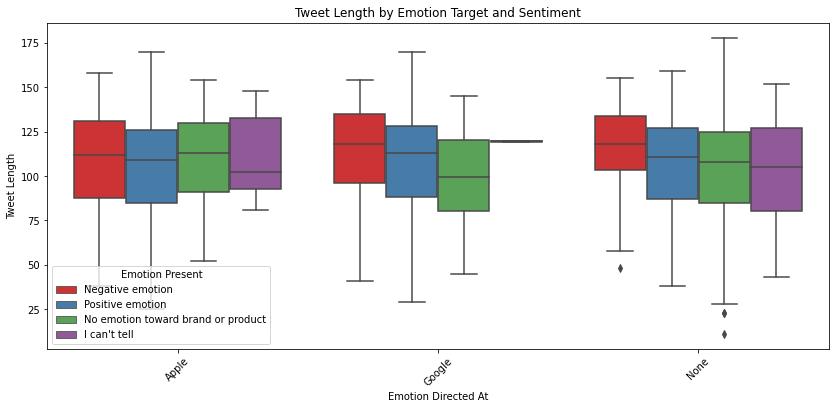

In [21]:
# Boxplot of Tweet Length by Emotion Target and Sentiment
plt.figure(figsize=(14,6))
sns.boxplot(
    data=df_Tweet, 
    x='brand', 
    y='tweet_length', 
    hue='emotion', 
    palette='Set1'
)
plt.xticks(rotation=45)
plt.title('Tweet Length by Emotion Target and Sentiment')
plt.xlabel('Emotion Directed At')
plt.ylabel('Tweet Length')
plt.legend(title='Emotion Present')
plt.show()


Longer emotional tweets may be more prevalent for certain brands.

Suggests an interaction effect between target entity and sentiment that could improve model performance.

Use interaction terms or allow tree-based models to capture this.

🔹 c) Correlation Between Length and Word Count (Numerical Features)

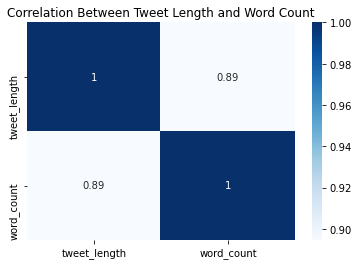

In [22]:
# Correlation Heatmap
corr = df_Tweet[['tweet_length', 'word_count']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Between Tweet Length and Word Count')
plt.show()

Expect very high correlation (~0.9).

Keep only one of these features (preferably word_count if using token-based models) to avoid redundancy.

# **4. DATA PREPROCESSING**
This is where raw data is transformed, cleaned, and prepared for analysis or modeling.

1. Lowercasing, Remove Punctuation, URLs, Mentions

In [23]:
# Data Preprocessing
def clean_text(text):
     # Lowercase
    text = text.lower()  
     # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove @mentions 
    text = re.sub(r'@\w+', '', text)  
     # Remove punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)  
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()  
    return text

df_Tweet['clean_text'] = df_Tweet['text'].apply(clean_text)


2. Word Tokenization

In [24]:
# Word Tokenization
df_Tweet['tokens'] = df_Tweet['clean_text'].apply(lambda x: x.split())

3. Class Imbalance Check


In [25]:
# Check class imbalance in the target variable
df_Tweet['emotion'].value_counts()

No emotion toward brand or product    5372
Positive emotion                      2968
Negative emotion                       569
I can't tell                           156
Name: emotion, dtype: int64

In [26]:
# Handling Class Imbalance
# Rename for clarity
df_Tweet.rename(columns={'emotion': 'sentiment'}, inplace=True)

# Separate majority and minority classes
majority = df_Tweet[df_Tweet['sentiment'] == 'No']
minority = df_Tweet[df_Tweet['sentiment'] == 'Yes']

# Upsample minority
minority_upsampled = resample(minority, 
                              replace=True, 
                              n_samples=len(majority), 
                              random_state=42)

# Combine and shuffle
df_Tweet_balanced = pd.concat([majority, minority_upsampled]).sample(frac=1, random_state=42).reset_index(drop=True)


In [29]:
df_Tweet.head()

,text,target,sentiment,brand,tweet_length,word_count,clean_text,tokens
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,Apple,127,23,i have a 3g iphone after 3 hrs tweeting at ris...,"[i, have, a, 3g, iphone, after, 3, hrs, tweeti..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,Apple,139,22,know about awesome ipadiphone app that youll l...,"[know, about, awesome, ipadiphone, app, that, ..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,Apple,79,15,can not wait for ipad 2 also they should sale ...,"[can, not, wait, for, ipad, 2, also, they, sho..."
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,Apple,82,15,i hope this years festival isnt as crashy as t...,"[i, hope, this, years, festival, isnt, as, cra..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,Google,131,17,great stuff on fri sxsw marissa mayer google t...,"[great, stuff, on, fri, sxsw, marissa, mayer, ..."


In [27]:
df_Tweet_balanced[['text', 'clean_text', 'tokens', 'sentiment',"brand"]].head()


,text,clean_text,tokens,sentiment


In [28]:
# Save the Cleaned Dataset to CSV
df_Tweet_balanced.to_csv('Data/Cleaned_Tweet.csv', index=False)
